**Cleaning Data**

In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
import statsmodels.api as sm


warnings.filterwarnings("ignore")

new_output = pd.read_csv('df_realestate.csv', keep_default_na=False, na_values=[""])
new_output = new_output.rename(columns = {'Living_Area(Sqft)':'Living_Area'}) 
print(new_output.shape[0])
print(new_output.shape[1])
print(new_output.columns)

760
64
Index(['Unnamed: 0', 'Street', 'City', 'State', 'Zipcode', 'Neighbourhood',
       'Subdivision', 'Price', 'Zestimate', 'Bedroom', 'Bathroom',
       'Year_Built', 'Longitude', 'Latitude', 'Living_Area', 'Home_Type',
       'Lot_Size(Sqft)', 'HOA_Per_Month', 'Brokerage', 'Last_Sold_Price',
       'Zpid', 'Home_Status', 'hasHeating', 'hasCooling', 'hasFireplace',
       'laundryFeatures', 'furnished', 'buildingArea', 'parking', 'hasGarage',
       'garageSpaces', 'hasOpenParking', 'hasCarport', 'levels',
       'hasPrivatePool', 'hasSpa', 'hasView', 'frontageType',
       'architecturalStyle', 'roofType', 'propertyCondition',
       'isNewConstruction', 'developmentStatus', 'hasHomeWarranty',
       'hasElectricOnProperty', 'greenBuildingVerificationType',
       'hasPetsAllowed', 'hasRentControl', 'securityFeatures', 'Is_New_Home',
       'Is_For_Auction', 'Is_Bank_Owned', 'Price_History', 'Event', 'Date',
       'Agent_Name', 'Agent_Phone_No.', 'Posting_Group_Name',
       'Fir

* **Step-1:** Selecting the relevant data. After carefully looking at scrapped data we selected 28 variables from 63 variables which were relevant for our project.

In [2]:
#select relevant columns
df=new_output.iloc[:,[1,2,4,7,8,9,10,11,14,15,16,17,19,22,23,26,31,32,41,43,49,50,51,52,59,61,63,54]]
df.head()

,Street,City,Zipcode,Price,Zestimate,Bedroom,Bathroom,Year_Built,Living_Area,Home_Type,...,isNewConstruction,hasHomeWarranty,Is_New_Home,Is_For_Auction,Is_Bank_Owned,Price_History,First_Nearby_School_Rating,Second_Nearby_School_Rating,Third_Nearby_School_Rating,Date
0,1759 Margaret St,San Jose,95116,750000,681930.0,2.0,1.0,1947.0,884.0,SINGLE_FAMILY,...,False,False,False,False,False,750000.0,3,3,6,2020-09-24
1,218 Galano Plz,Union City,94587,499000,483204.0,2.0,2.0,1985.0,880.0,CONDO,...,False,False,False,False,False,499000.0,5,3,7,2020-09-24
2,"Residence AR Plan, The Residences at Anson",Burlingame,94010,1464254,1564243.0,2.0,3.0,NaN,1491.0,TOWNHOUSE,...,True,False,True,False,False,NaN,8,8,10,NaN
3,6778 Elwood Rd,San Jose,95120,2050000,2331142.0,4.0,4.0,2014.0,3456.0,SINGLE_FAMILY,...,False,False,False,False,False,2050000.0,9,8,9,2020-09-23
4,875 Madison St,Santa Clara,95050,1695000,1619848.0,5.0,4.0,1951.0,2586.0,SINGLE_FAMILY,...,False,False,False,False,False,1695000.0,6,5,8,2020-09-24


* **Step-2:** Checking for missing values in the dataset. In the 28 selected variables we looked for missing values. There are 16 variables that have missing values.

In [3]:
print(df.isnull().sum())

Street                           0
City                             0
Zipcode                          0
Price                            0
Zestimate                       49
Bedroom                          8
Bathroom                        12
Year_Built                      19
Living_Area                      8
Home_Type                        0
Lot_Size(Sqft)                  87
HOA_Per_Month                  487
Last_Sold_Price                201
hasHeating                      39
hasCooling                      53
furnished                        0
hasOpenParking                   0
hasCarport                       0
isNewConstruction               12
hasHomeWarranty                  0
Is_New_Home                      0
Is_For_Auction                   0
Is_Bank_Owned                    0
Price_History                   24
First_Nearby_School_Rating       8
Second_Nearby_School_Rating     12
Third_Nearby_School_Rating      37
Date                            24
dtype: int64


* **Step-3:** Missing Value Treatment.

* **Remove rows with missing value**

     * Since it is difficult to find the appropriate values to fill in the missing values for Year_Built, Date, and Zestimate. Therefore, we decided to remove the rows with missing values for these variables.

In [4]:
df.dropna(axis='index', how='any',subset=['Year_Built','Date','Zestimate'],inplace=True)
print(df.shape[0])
print(df.shape[1])

691
28


   * **Filling the Missing Value**

        * For other categorical variables such as hasHeating, hasCooling, isNewConstruction, we used "unknown" to fill in the missing values.
        * For the other numerical variables, we replaced the missing values with the median of each variable. Also, we replaced the values that had 0 in the Last_Sold_Price with the median.




In [5]:
df['hasHeating'].fillna(value="unknow", inplace=True)
df['hasCooling'].fillna(value="unknow", inplace=True)
df['isNewConstruction'].fillna(value="unknow", inplace=True)
df['Bedroom'].fillna(df['Bedroom'].median(), inplace = True)
df['Bathroom'].fillna(df['Bathroom'].median(), inplace = True)
df['Living_Area'].fillna(df['Living_Area'].median(), inplace = True)
df['Lot_Size(Sqft)'].fillna(df['Lot_Size(Sqft)'].median(), inplace = True)
df['HOA_Per_Month'].fillna(value=0, inplace=True)# filling 0 into the missing values,because the HOA does not applied
df['Last_Sold_Price'].fillna(df['Last_Sold_Price'].median(), inplace = True)
df.loc[df.Last_Sold_Price == 0, 'Last_Sold_Price'] = df['Last_Sold_Price'].median()

df['Price_History'].fillna(df['Price_History'].median(), inplace = True)

* **Remove rows that have Price = 0**

    * We checked the value of Price, and found there are 3 houses that were listed for auction. These house had the Price at 0. They are not helpful for us to analyze the housing price, so we decided to remove them.

In [6]:
price_0=df[df['Price']==0]
price_0

,Street,City,Zipcode,Price,Zestimate,Bedroom,Bathroom,Year_Built,Living_Area,Home_Type,...,isNewConstruction,hasHomeWarranty,Is_New_Home,Is_For_Auction,Is_Bank_Owned,Price_History,First_Nearby_School_Rating,Second_Nearby_School_Rating,Third_Nearby_School_Rating,Date
100,1885 Guinda St,Palo Alto,94303,0,4135890.0,3.0,3.0,1945.0,2070.0,SINGLE_FAMILY,...,False,False,False,True,False,0.0,8,8,9,2020-09-17
176,112 Belmont Ave,South San Francisco,94080,0,963667.0,4.0,1.0,1941.0,1100.0,SINGLE_FAMILY,...,False,False,False,True,False,0.0,4,4,6,2020-09-02
582,21227 Highland Dr,Castro Valley,94552,0,948538.0,4.0,2.5,2006.0,1900.0,SINGLE_FAMILY,...,False,False,False,True,False,0.0,8,7,9,2020-09-24


In [7]:
Price_0_index=df[df['Price']==0].index
df.drop(Price_0_index,inplace=True)

* **Step-4:** Create new columns

 * **Get the month and year from column "Date" and create the new column MonthYear_value and Year**

In [8]:
import datetime as dt
#Convert Date from str to Datetime
df['Date']=pd.to_datetime(df['Date'])
df['MonthYear_value'] = df['Date'].dt.to_period('M')
df['Year']= df['Date'].dt.to_period('Y')
df.head()

,Street,City,Zipcode,Price,Zestimate,Bedroom,Bathroom,Year_Built,Living_Area,Home_Type,...,Is_New_Home,Is_For_Auction,Is_Bank_Owned,Price_History,First_Nearby_School_Rating,Second_Nearby_School_Rating,Third_Nearby_School_Rating,Date,MonthYear_value,Year
0,1759 Margaret St,San Jose,95116,750000,681930.0,2.0,1.0,1947.0,884.0,SINGLE_FAMILY,...,False,False,False,750000.0,3,3,6,2020-09-24,2020-09,2020
1,218 Galano Plz,Union City,94587,499000,483204.0,2.0,2.0,1985.0,880.0,CONDO,...,False,False,False,499000.0,5,3,7,2020-09-24,2020-09,2020
3,6778 Elwood Rd,San Jose,95120,2050000,2331142.0,4.0,4.0,2014.0,3456.0,SINGLE_FAMILY,...,False,False,False,2050000.0,9,8,9,2020-09-23,2020-09,2020
4,875 Madison St,Santa Clara,95050,1695000,1619848.0,5.0,4.0,1951.0,2586.0,SINGLE_FAMILY,...,False,False,False,1695000.0,6,5,8,2020-09-24,2020-09,2020
5,733 Henry St,Oakland,94607,899000,737396.0,4.0,4.0,1893.0,1833.0,SINGLE_FAMILY,...,False,False,False,730000.0,2,1,2,2020-08-03,2020-08,2020


   * **Create a new column for average school rating**

        * We calculated the average of three school rating to create a new column **"avg_school_rating"**

In [9]:
def get_avg_school_rating(row):
    list_of_school_ratings = [
        'First_Nearby_School_Rating', 
        'Second_Nearby_School_Rating', 
        'Third_Nearby_School_Rating'
    ]
    
    sum_school_rating = 0
    total = 0
    
    for item in list_of_school_ratings:
        if (row[item]
            and pd.notna(row[item])
            and row[item] != 'None'):
            
            sum_school_rating += float(row[item])
            total += 1
            
    if total > 0:
        result = int(sum_school_rating/total)
    else:
        result = 0

    return result

df['avg_school_rating'] = df.apply(lambda row: get_avg_school_rating(row),axis=1)
df.drop(columns=['First_Nearby_School_Rating',
                  'Second_Nearby_School_Rating',
                  'Third_Nearby_School_Rating'], inplace=True)
df

,Street,City,Zipcode,Price,Zestimate,Bedroom,Bathroom,Year_Built,Living_Area,Home_Type,...,isNewConstruction,hasHomeWarranty,Is_New_Home,Is_For_Auction,Is_Bank_Owned,Price_History,Date,MonthYear_value,Year,avg_school_rating
0,1759 Margaret St,San Jose,95116,750000,681930.0,2.0,1.0,1947.0,884.0,SINGLE_FAMILY,...,False,False,False,False,False,750000.0,2020-09-24,2020-09,2020,4
1,218 Galano Plz,Union City,94587,499000,483204.0,2.0,2.0,1985.0,880.0,CONDO,...,False,False,False,False,False,499000.0,2020-09-24,2020-09,2020,5
3,6778 Elwood Rd,San Jose,95120,2050000,2331142.0,4.0,4.0,2014.0,3456.0,SINGLE_FAMILY,...,False,False,False,False,False,2050000.0,2020-09-23,2020-09,2020,8
4,875 Madison St,Santa Clara,95050,1695000,1619848.0,5.0,4.0,1951.0,2586.0,SINGLE_FAMILY,...,False,False,False,False,False,1695000.0,2020-09-24,2020-09,2020,6
5,733 Henry St,Oakland,94607,899000,737396.0,4.0,4.0,1893.0,1833.0,SINGLE_FAMILY,...,False,False,False,False,False,730000.0,2020-08-03,2020-08,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,425 Stanford Ave,Palo Alto,94306,2695000,2696926.0,2.0,2.0,1924.0,1080.0,SINGLE_FAMILY,...,False,False,False,False,False,2695000.0,2020-09-22,2020-09,2020,8
756,2368 Benton St,Santa Clara,95050,1290000,1361574.0,3.0,2.0,1954.0,1330.0,SINGLE_FAMILY,...,False,False,False,False,False,1290000.0,2020-09-24,2020-09,2020,6
757,4101 Greenacre Rd,Castro Valley,94546,814879,814879.0,3.0,2.0,1952.0,1118.0,SINGLE_FAMILY,...,False,False,False,False,False,610000.0,2006-04-13,2006-04,2006,8
758,3808 Monterey Blvd,Oakland,94619,849000,948630.0,3.0,1.0,1926.0,1357.0,SINGLE_FAMILY,...,False,False,False,False,False,849000.0,2020-09-18,2020-09,2020,1


* **Step-5:** Changed all the variables to appropriate data type
    * Most numerical data is changed to integer type. Only Bathroom is float type, because some houses have 1.5 or 2,5 bathrooms.
    * Categorical datas are changed to string type.
    * Also, when we collect the data from Zillow website, there were some city names that were written in upper case and lower case that caused duplicate values. For example, "union City" and "Union City". Therefore, we converted all city names to upper case in order to make the values case insensitive.


**Changes the datatypes**

In [10]:
columns_int=['Zestimate','Bedroom','Year_Built','Living_Area','Lot_Size(Sqft)',
           'HOA_Per_Month','Last_Sold_Price','Price_History']
df[columns_int]=df[columns_int].astype(int)
columns_str=['Zipcode','furnished','hasOpenParking','hasCarport','hasHomeWarranty',
             'Is_New_Home','Is_For_Auction','Is_Bank_Owned']
df[columns_str]=df[columns_str].astype(str)
df['City']=df['City'].str.upper()
df.dtypes

Street                       object
City                         object
Zipcode                      object
Price                         int64
Zestimate                     int64
Bedroom                       int64
Bathroom                    float64
Year_Built                    int64
Living_Area                   int64
Home_Type                    object
Lot_Size(Sqft)                int64
HOA_Per_Month                 int64
Last_Sold_Price               int64
hasHeating                   object
hasCooling                   object
furnished                    object
hasOpenParking               object
hasCarport                   object
isNewConstruction            object
hasHomeWarranty              object
Is_New_Home                  object
Is_For_Auction               object
Is_Bank_Owned                object
Price_History                 int64
Date                 datetime64[ns]
MonthYear_value           period[M]
Year                  period[A-DEC]
avg_school_rating           

In [11]:
# Check the missing values and datatypes
print(df.isnull().sum())
print(df.dtypes)

Street               0
City                 0
Zipcode              0
Price                0
Zestimate            0
Bedroom              0
Bathroom             0
Year_Built           0
Living_Area          0
Home_Type            0
Lot_Size(Sqft)       0
HOA_Per_Month        0
Last_Sold_Price      0
hasHeating           0
hasCooling           0
furnished            0
hasOpenParking       0
hasCarport           0
isNewConstruction    0
hasHomeWarranty      0
Is_New_Home          0
Is_For_Auction       0
Is_Bank_Owned        0
Price_History        0
Date                 0
MonthYear_value      0
Year                 0
avg_school_rating    0
dtype: int64
Street                       object
City                         object
Zipcode                      object
Price                         int64
Zestimate                     int64
Bedroom                       int64
Bathroom                    float64
Year_Built                    int64
Living_Area                   int64
Home_Type          

* **Step-6:** Finding outliers.

**Boxplot of Price**
 * Check if there is any outliers in the Price by using boxplot

Text(0.5, 0, 'Price (1 = $10,000,000)')

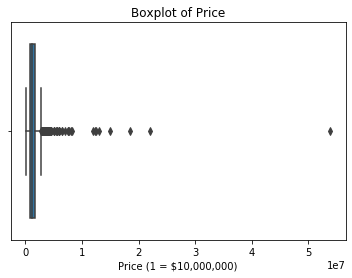

In [12]:

sns.boxplot(x=df['Price'])
plt.title('Boxplot of Price')
plt.xlabel('Price (1 = $10,000,000)')

* From the boxplot chart above, we can see there are some outliers in the Price. 

In [13]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

780300.0


**Create a list of outlier prices**
   * Using IQR method to find all outlier values.
   * There are 71 rows that have price in outlier range.
   * The price in outlier range is from $ 2,825,000 - 53,888,000 

In [14]:
outlier= Q3+1.5*IQR
print(outlier)


outlier_price=df.loc[df['Price']>outlier,['Home_Type','Price','Living_Area','Lot_Size(Sqft)','MonthYear_value']]
outlier_price.sort_values(by='Price',ascending=False)


2819700.0


,Home_Type,Price,Living_Area,Lot_Size(Sqft),MonthYear_value
14,SINGLE_FAMILY,53888000,12657,583704,2020-08
120,SINGLE_FAMILY,22000000,7440,5270,2020-08
525,SINGLE_FAMILY,18500000,6024,12823,2020-08
720,SINGLE_FAMILY,15000000,6780,12501,2020-08
225,SINGLE_FAMILY,12999000,5063,8306,2020-07
...,...,...,...,...,...
256,SINGLE_FAMILY,2980000,5008,435600,2020-09
295,SINGLE_FAMILY,2899998,2640,12000,2020-09
356,SINGLE_FAMILY,2899900,3278,5235,2020-08
698,SINGLE_FAMILY,2880000,2220,11935,2020-09


In [15]:
outlier_price.to_csv('outlier_price.csv',index=False)

**In this project, we focus on analyzing the median price housing. Therefore, we removed the outliers, and created a new dataframe without outliers**

In [16]:
# Create a new dataframe without outlier
df_cleaned = df[df['Price']< outlier]
df_cleaned.head()

,Street,City,Zipcode,Price,Zestimate,Bedroom,Bathroom,Year_Built,Living_Area,Home_Type,...,isNewConstruction,hasHomeWarranty,Is_New_Home,Is_For_Auction,Is_Bank_Owned,Price_History,Date,MonthYear_value,Year,avg_school_rating
0,1759 Margaret St,SAN JOSE,95116,750000,681930,2,1.0,1947,884,SINGLE_FAMILY,...,False,False,False,False,False,750000,2020-09-24,2020-09,2020,4
1,218 Galano Plz,UNION CITY,94587,499000,483204,2,2.0,1985,880,CONDO,...,False,False,False,False,False,499000,2020-09-24,2020-09,2020,5
3,6778 Elwood Rd,SAN JOSE,95120,2050000,2331142,4,4.0,2014,3456,SINGLE_FAMILY,...,False,False,False,False,False,2050000,2020-09-23,2020-09,2020,8
4,875 Madison St,SANTA CLARA,95050,1695000,1619848,5,4.0,1951,2586,SINGLE_FAMILY,...,False,False,False,False,False,1695000,2020-09-24,2020-09,2020,6
5,733 Henry St,OAKLAND,94607,899000,737396,4,4.0,1893,1833,SINGLE_FAMILY,...,False,False,False,False,False,730000,2020-08-03,2020-08,2020,1


**Data after cleaning**
* After cleaning data, we have a new dataframe with 617 rows and 27 columns.

* Save dataframe to csv file name **"df_cleaned.csv"**

In [17]:
df_cleaned.to_csv('df_cleaned.csv',index=False)

In [18]:
df1=pd.read_csv('df_cleaned.csv')
df1

,Street,City,Zipcode,Price,Zestimate,Bedroom,Bathroom,Year_Built,Living_Area,Home_Type,...,isNewConstruction,hasHomeWarranty,Is_New_Home,Is_For_Auction,Is_Bank_Owned,Price_History,Date,MonthYear_value,Year,avg_school_rating
0,1759 Margaret St,SAN JOSE,95116,750000,681930,2,1.0,1947,884,SINGLE_FAMILY,...,False,False,False,False,False,750000,2020-09-24,2020-09,2020,4
1,218 Galano Plz,UNION CITY,94587,499000,483204,2,2.0,1985,880,CONDO,...,False,False,False,False,False,499000,2020-09-24,2020-09,2020,5
2,6778 Elwood Rd,SAN JOSE,95120,2050000,2331142,4,4.0,2014,3456,SINGLE_FAMILY,...,False,False,False,False,False,2050000,2020-09-23,2020-09,2020,8
3,875 Madison St,SANTA CLARA,95050,1695000,1619848,5,4.0,1951,2586,SINGLE_FAMILY,...,False,False,False,False,False,1695000,2020-09-24,2020-09,2020,6
4,733 Henry St,OAKLAND,94607,899000,737396,4,4.0,1893,1833,SINGLE_FAMILY,...,False,False,False,False,False,730000,2020-08-03,2020-08,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,425 Stanford Ave,PALO ALTO,94306,2695000,2696926,2,2.0,1924,1080,SINGLE_FAMILY,...,False,False,False,False,False,2695000,2020-09-22,2020-09,2020,8
613,2368 Benton St,SANTA CLARA,95050,1290000,1361574,3,2.0,1954,1330,SINGLE_FAMILY,...,False,False,False,False,False,1290000,2020-09-24,2020-09,2020,6
614,4101 Greenacre Rd,CASTRO VALLEY,94546,814879,814879,3,2.0,1952,1118,SINGLE_FAMILY,...,False,False,False,False,False,610000,2006-04-13,2006-04,2006,8
615,3808 Monterey Blvd,OAKLAND,94619,849000,948630,3,1.0,1926,1357,SINGLE_FAMILY,...,False,False,False,False,False,849000,2020-09-18,2020-09,2020,1


In [19]:
df1.dtypes

Street                object
City                  object
Zipcode                int64
Price                  int64
Zestimate              int64
Bedroom                int64
Bathroom             float64
Year_Built             int64
Living_Area            int64
Home_Type             object
Lot_Size(Sqft)         int64
HOA_Per_Month          int64
Last_Sold_Price        int64
hasHeating            object
hasCooling            object
furnished               bool
hasOpenParking          bool
hasCarport              bool
isNewConstruction     object
hasHomeWarranty         bool
Is_New_Home             bool
Is_For_Auction          bool
Is_Bank_Owned           bool
Price_History          int64
Date                  object
MonthYear_value       object
Year                   int64
avg_school_rating      int64
dtype: object

In [20]:
print(df1.shape[1])
print(df1.shape[0])

28
617


**Data Visualization**
* Using Data Visualization to understand the variables and see the overview of their impacts on the housing price.

**Heatmap**

We use heat map to see the correlation between numerical variables and the housing price.
   * Living Area is highly correlated to the price with 62%.
   * HOA is negatively related to the housing price


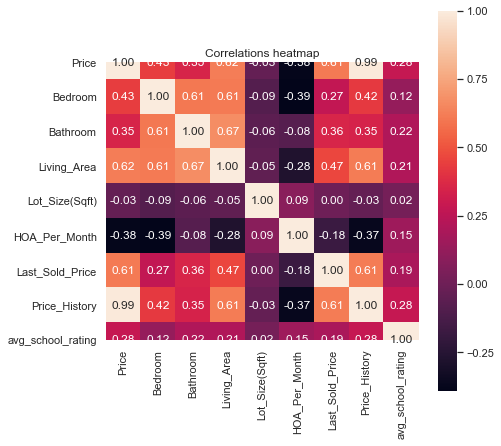

In [21]:
columns_num=['Price','Bedroom','Bathroom','Living_Area','Lot_Size(Sqft)',
           'HOA_Per_Month','Last_Sold_Price','Price_History','avg_school_rating']
#Find out correlation between columns and plot
corrs = np.corrcoef(df1[columns_num].values.T)
sns.set(font_scale=1)
sns.set(rc={'figure.figsize':(7,7)})
hm=sns.heatmap(corrs, cbar = True, annot=True, square = True, fmt = '.2f',
              yticklabels = columns_num, xticklabels = columns_num).set_title('Correlations heatmap')

fig = hm.get_figure()
fig.savefig('correlations.png')

**Relation between Housing Price and Year Built**
   * Most of the house was built after 1950.
   * The year built does not really affect to the housing price. As some houses were built in 1900 still have same price as the one built later.


In [22]:
min_year=df1['Year_Built'].min()
max_year=df1['Year_Built'].max()
yearbuilt=pd.DataFrame({'Oldest Year Built':[min_year],'Newest Year Built':[max_year]})
yearbuilt

,Oldest Year Built,Newest Year Built
0,1881,2020


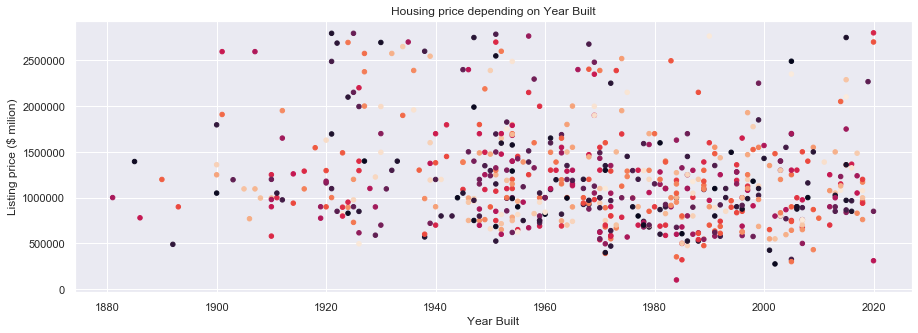

In [23]:
#Plot
plt.figure(figsize=(15,5))
colors = np.random.rand(len(df1))
area = 20 
plt.scatter(df1['Year_Built'],df1['Price'] , s=area,c=colors, alpha=1)
plt.xlabel('Year Built')
plt.ylabel('Listing price ($ milion)')
plt.title('Housing price depending on Year Built')
plt.show()




**Home Types vs Price**

* Single Family house is sold the most, and has the price varies from around \$500,000 to more than $2,500,000
 

Text(0.5, 0, 'Listing price in $')

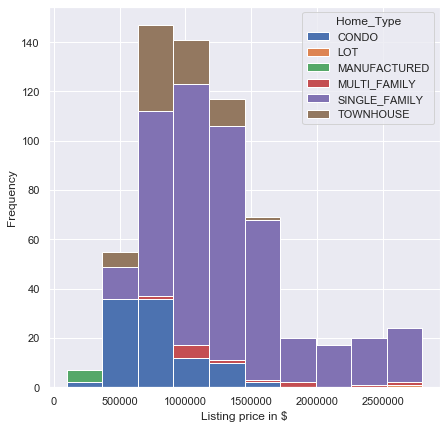

In [24]:
# Pivot table Home Type and Listing Price
df1.pivot(columns = 'Home_Type', values = 'Price').plot.hist(stacked = True)
plt.xlabel('Listing price in $')

* This chart shows that the single_family sold the most, and the price spreads out from low to highest value*

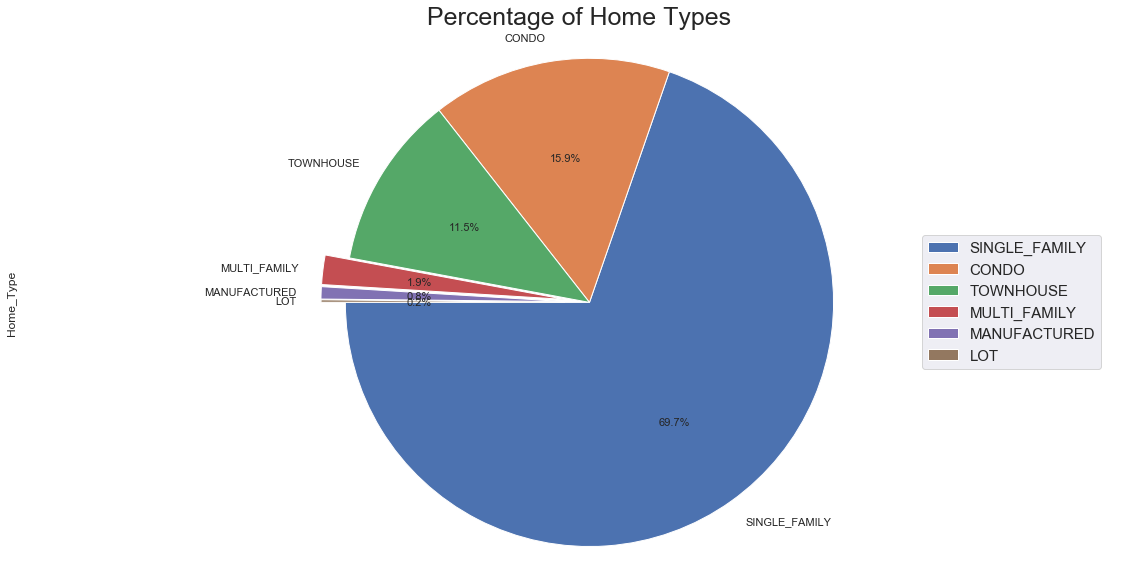

In [25]:
# Hometype piechart
hometype=df1['Home_Type'].value_counts()
explode=(0,0,0,0.1,0.1,0.1)
hometype.plot.pie(explode=explode, autopct='%1.1f%%', shadow=False, startangle=180,figsize=(20,10),fontsize=11)
plt.axis('equal')
plt.legend(loc='center left',bbox_to_anchor=(0.8,0.5),fontsize=15)
plt.title('Percentage of Home Types', fontsize=25)
plt.show()


* The pie chart shows the percentage of the types of house sold. As we can see, the single family house is sold the most.

SINGLE_FAMILY    430
CONDO             98
TOWNHOUSE         71
MULTI_FAMILY      12
MANUFACTURED       5
LOT                1
Name: Home_Type, dtype: int64


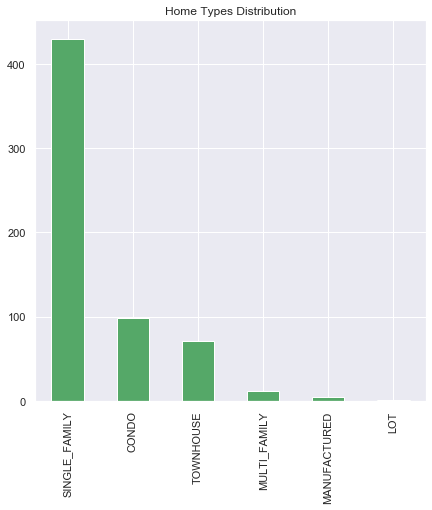

In [26]:
# Home Type barchart
print(hometype)
colors = np.random.rand(len(df1))
hometype.plot(kind="bar",color='g', title=("Home Types Distribution"))
plt.show()

**Median Price by Home Types**

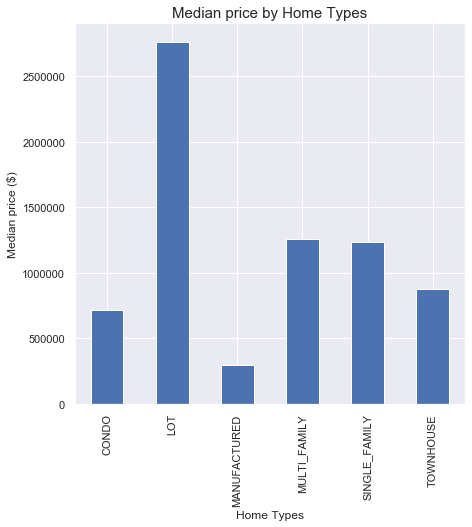

In [27]:
average_price_by_hometype = df1.groupby(['Home_Type'])['Price'].median()
#bar chart presents the average price by hometype
average_price_by_hometype.plot.bar()
plt.ylabel('Median price ($)')
plt.xlabel('Home Types')
plt.title('Median price by Home Types',fontsize=15)
plt.savefig('Median price by Home Types')
plt.show()

* The bar chart presents the median price of different home types. It points out that the Lot has the highest median price. The second highest median price is multifamily. Next are Single family house, Townhouse, Condo. And the lowest median price is Manufactured. 

In [28]:
pd.options.display.float_format = "{:.0f}".format # Suppress Scientific Notation
# Dataframe of average price by hometype
price_by_hometypes=pd.DataFrame(average_price_by_hometype, columns=['Price'])
averageprice_hometypes=price_by_hometypes.rename(columns={'Price':'Median Price'})
averageprice_hometypes.sort_values(by='Median Price',ascending=False)

,Median Price
Home_Type,
LOT,2765000
MULTI_FAMILY,1262000
SINGLE_FAMILY,1238500
TOWNHOUSE,874999
CONDO,720100
MANUFACTURED,300000


**Create a dataframe the house listing in September 2020**

The charts below show that the home type is sold the most in September 2020 is Single Family house.

In [29]:
df1_monthyear = df1.loc[df1['MonthYear_value']>='2020-09',['Home_Type','MonthYear_value','Price']]
df1_monthyear

,Home_Type,MonthYear_value,Price
0,SINGLE_FAMILY,2020-09,750000
1,CONDO,2020-09,499000
2,SINGLE_FAMILY,2020-09,2050000
3,SINGLE_FAMILY,2020-09,1695000
5,SINGLE_FAMILY,2020-09,899950
...,...,...,...
609,TOWNHOUSE,2020-09,1199000
610,SINGLE_FAMILY,2020-09,1399000
612,SINGLE_FAMILY,2020-09,2695000
613,SINGLE_FAMILY,2020-09,1290000


SINGLE_FAMILY    392
CONDO             75
TOWNHOUSE         63
MULTI_FAMILY       8
MANUFACTURED       4
LOT                1
Name: Home_Type, dtype: int64


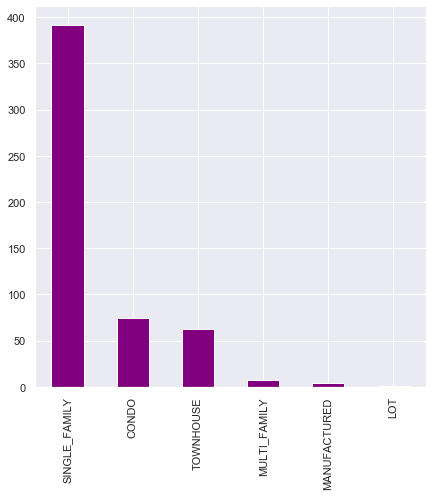

In [30]:
# Home Type barchart
hometype_now=df1_monthyear['Home_Type'].value_counts()
print(hometype_now)
hometype_now.plot(kind="bar",color='purple')
plt.show()

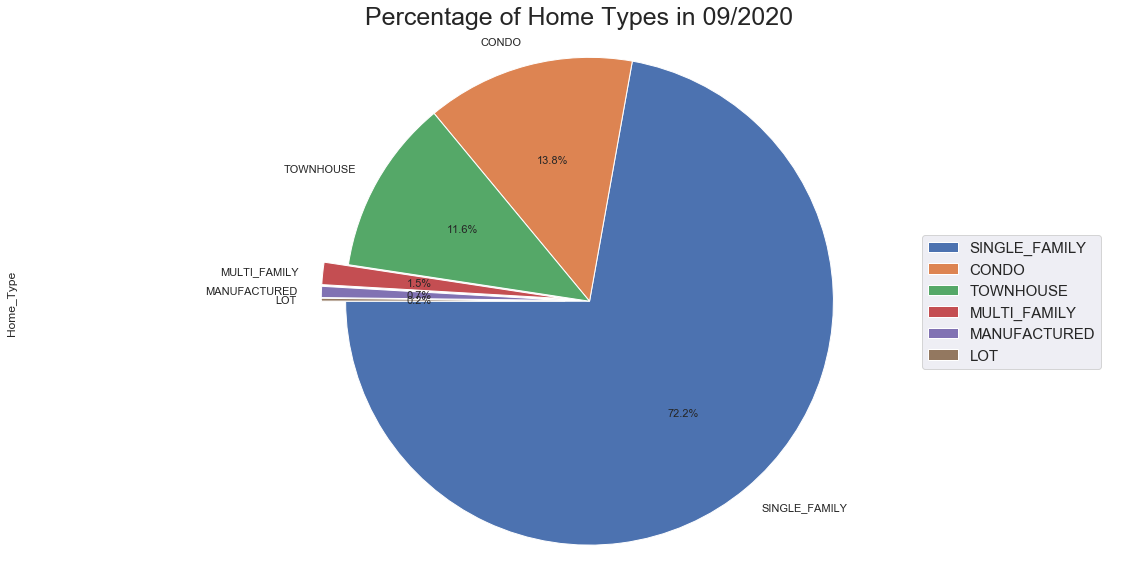

In [31]:
# Hometype piechart in 09/2020
explode1=(0,0,0,0.1,0.1,0.1)
hometype_now.plot.pie(explode=explode1, autopct='%1.1f%%', shadow=False, startangle=180,figsize=(20,10),fontsize=11)
plt.axis('equal')
plt.legend(loc='center left',bbox_to_anchor=(0.8,0.5),fontsize=15)
plt.title('Percentage of Home Types in 09/2020', fontsize=25)
plt.show()

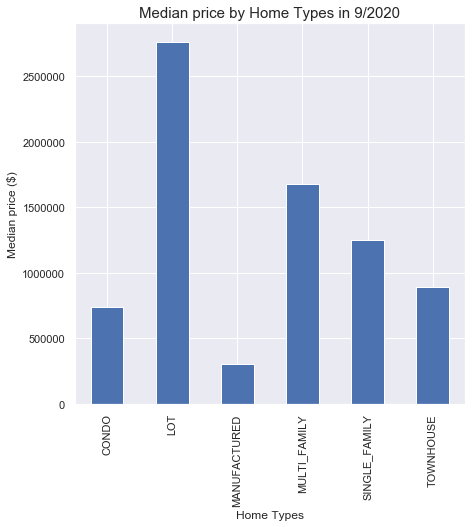

In [32]:
month_hometype = df1_monthyear.groupby(['Home_Type'])['Price'].median()
#bar chart presents the average price by hometype
month_hometype.plot.bar()
plt.ylabel('Median price ($)')
plt.xlabel('Home Types')
plt.title('Median price by Home Types in 9/2020',fontsize=15)
plt.savefig('Median price by Home Typesmonth in 92020')
plt.show()

**Median Sale Price by Year for Different House Types**

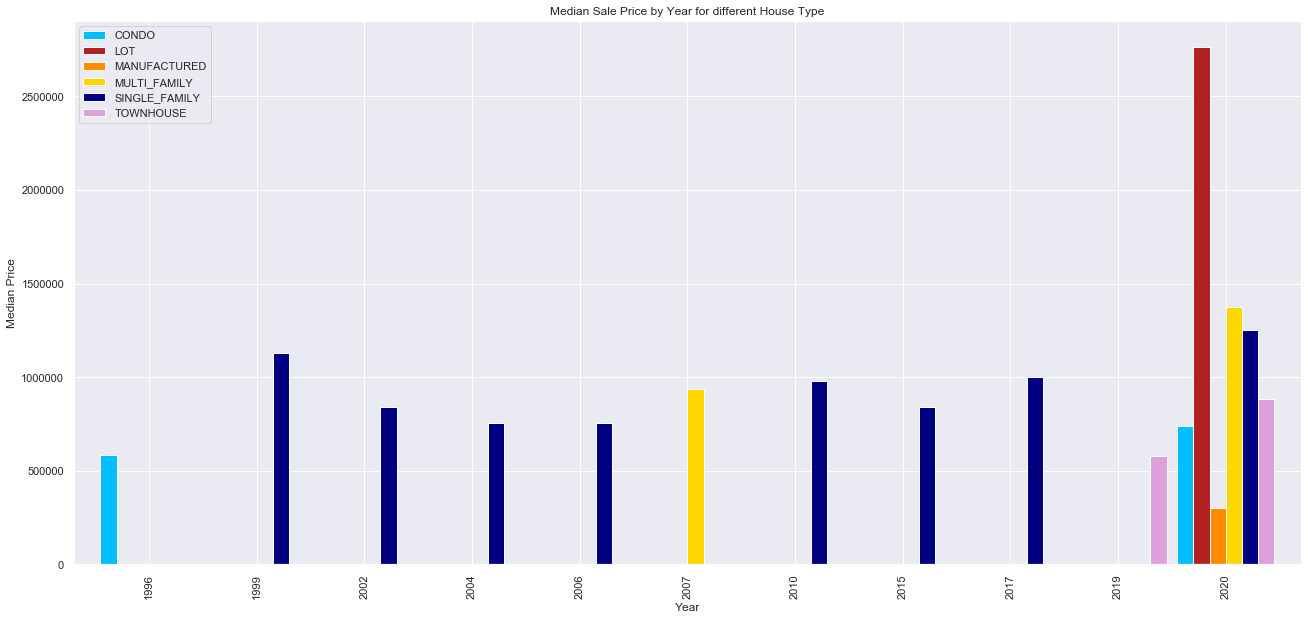

In [33]:
condo=df1.loc[:,["Home_Type","Price","Year"]]
median_price_by_year = condo.groupby(['Year',"Home_Type"])['Price'].median()
median_price_by_year 
# Dataframe of average price by HomeType
price_by_hometype=pd.DataFrame(median_price_by_year, columns=['Price'])
medianprice_hometype=price_by_hometype.rename(columns={'Price':'Median Price'})
fig, ax = plt.subplots()
medianprice_hometype
color_palette_list =["deepskyblue","firebrick","darkorange","gold","navy","plum"]
medianprice_hometype.unstack().plot(kind='bar',figsize=(22, 10),ax=ax,width = 0.9,color=color_palette_list)
ax.legend(["CONDO", "LOT","MANUFACTURED","MULTI_FAMILY","SINGLE_FAMILY","TOWNHOUSE"])
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)#Suppressing scientific notation
plt.ylabel("Median Price")
plt.title("Median Sale Price by Year for different House Type")
plt.show()

* The above figure shows that prices for Townhouse has increased in the year 2020 as compared 2019.Apart from that prices for Condo , Multi-family and Single- family  house type shows an upward trend.

**Year Wise Last Sold Price with respect to Home Type**

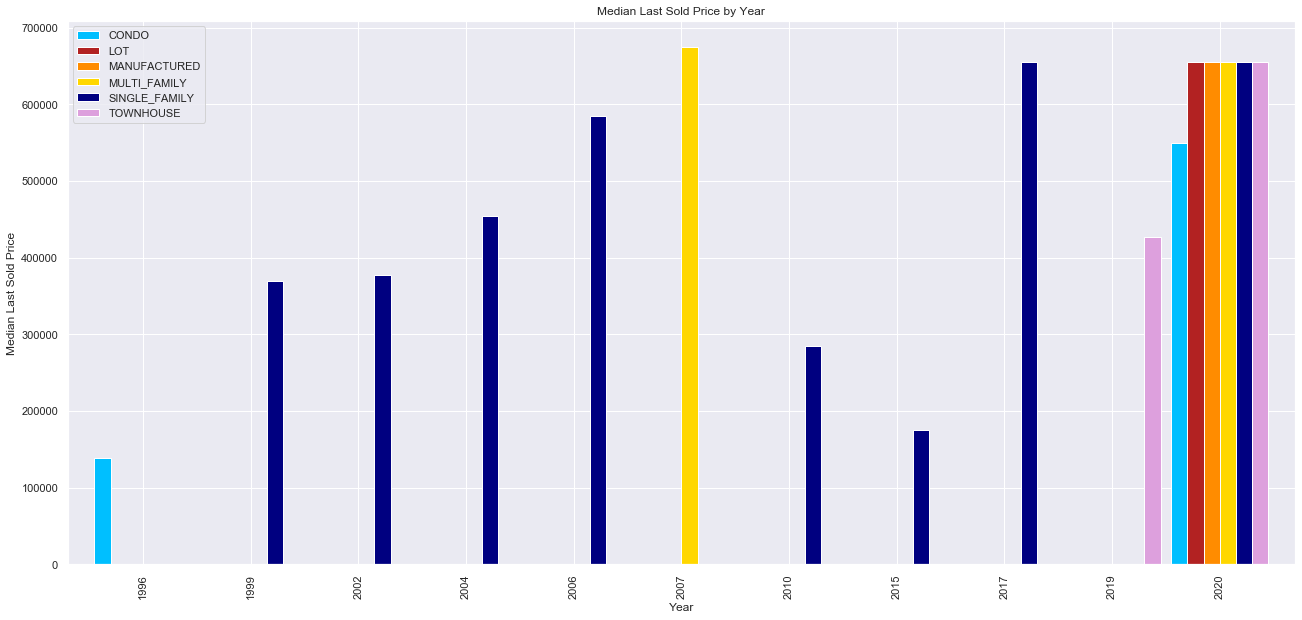

In [34]:
condo=df1.loc[:,["Home_Type","Last_Sold_Price","Year"]]
median_price_by_year = condo.groupby(['Year',"Home_Type"])['Last_Sold_Price'].median()
median_price_by_year 
# Dataframe of average last sold price by Hometype
price_by_hometype=pd.DataFrame(median_price_by_year, columns=['Last_Sold_Price'])
medianprice_hometype=price_by_hometype.rename(columns={'Last_Sold_Price':'Median Last Sold Price'})
fig, ax = plt.subplots()
medianprice_hometype
color_palette_list =["deepskyblue","firebrick","darkorange","gold","navy","plum"]
medianprice_hometype.unstack().plot(kind='bar',figsize=(22, 10),ax=ax,width = 0.9,color=color_palette_list)
ax.legend(["CONDO", "LOT","MANUFACTURED","MULTI_FAMILY","SINGLE_FAMILY","TOWNHOUSE"])
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.ylabel("Median Last Sold Price")
plt.title("Median Last Sold Price by Year")
plt.show()

* Comparing with the previous graph the last sold prices are higher all the house type except for the year 2015 and before 1996

**Year wise change in Median Price for House Type Condo**

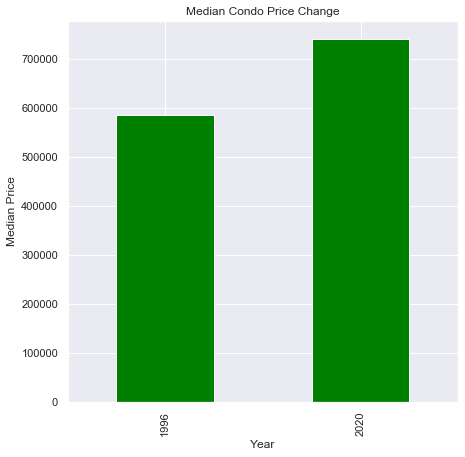

In [35]:
condo=df1.loc[:,["Home_Type","Price","Year"]]
condo=condo[condo['Home_Type']=="CONDO"]
condo=condo.groupby(['Year'])['Price'].median()
condo.plot.bar(color="green")
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.ylabel("Median Price")
plt.xlabel("Year")
plt.title("Median Condo Price Change")
plt.show()

* The price for condo has increased

**Year wise change in Median Price for House Type LOT**

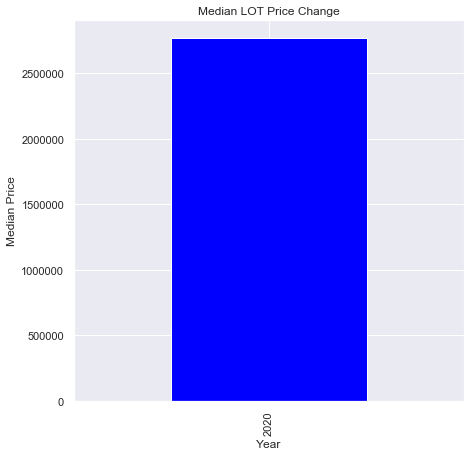

In [36]:
condo=df1.loc[:,["Home_Type","Price","Year"]]
condo=condo[condo['Home_Type']=="LOT"]
condo=condo.groupby(['Year'])['Price'].median()
condo.plot.bar(color="blue")
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.ylabel("Median Price")
plt.xlabel("Year")
plt.title("Median LOT Price Change")
plt.show()

* Only 2020 data is available

**Year wise change in Median Price for House Type Manufactured**

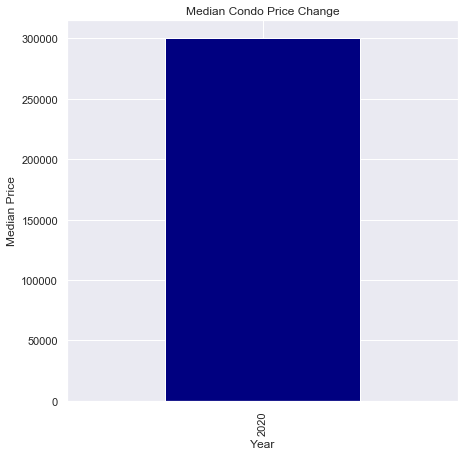

In [37]:
condo=df1.loc[:,["Home_Type","Price","Year"]]
condo=condo[condo['Home_Type']=="MANUFACTURED"]
condo=condo.groupby(['Year'])['Price'].median()
condo.plot.bar(color="navy")
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.ylabel("Median Price")
plt.xlabel("Year")
plt.title("Median Condo Price Change")
plt.show()

* Only 2020 data is available

**Year wise change in Median Price for House Type Single_Family**

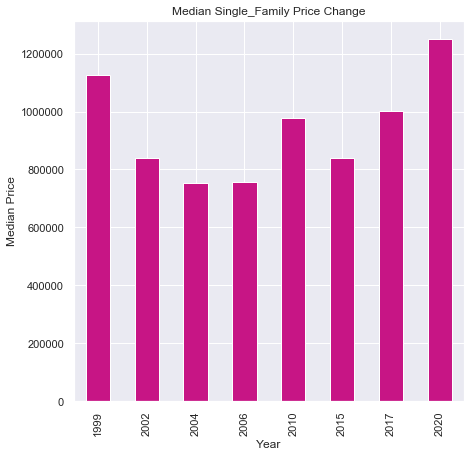

In [38]:
condo=df1.loc[:,["Home_Type","Price","Year"]]
condo=condo[condo['Home_Type']=="SINGLE_FAMILY"]
condo=condo.groupby(['Year'])['Price'].median()
condo.plot.bar(color="mediumvioletred")
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.ylabel("Median Price")
plt.xlabel("Year")
plt.title("Median Single_Family Price Change")
plt.show()

* The price for Single Family is fluctuating

**Year wise change in Median Price for House Type Multi_Family**

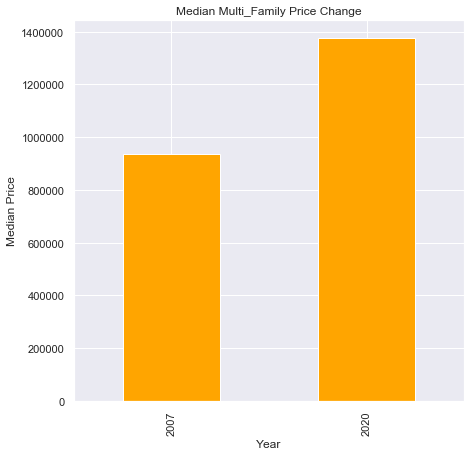

In [39]:
condo=df1.loc[:,["Home_Type","Price","Year"]]
condo=condo[condo['Home_Type']=="MULTI_FAMILY"]
condo=condo.groupby(['Year'])['Price'].median()
condo.plot.bar(color="orange")
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.ylabel("Median Price")
plt.xlabel("Year")
plt.title("Median Multi_Family Price Change")
plt.show()

* The price for Multi Family has increased from 2007 to 2020

**Year wise change in Median Price for House Type Townhouse**

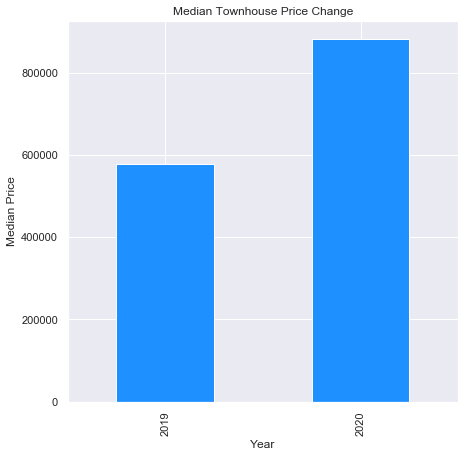

In [40]:
condo=df1.loc[:,["Home_Type","Price","Year"]]
condo=condo[condo['Home_Type']=="TOWNHOUSE"]
condo=condo.groupby(['Year'])['Price'].median()
condo.plot.bar(color="dodgerblue")
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.ylabel("Median Price")
plt.xlabel("Year")
plt.title("Median Townhouse Price Change")
plt.show()

* The price of Townhouse has increased from 2019 to 2020

**Comparision of Price Listed Vs Last Sold Price Year Wise**

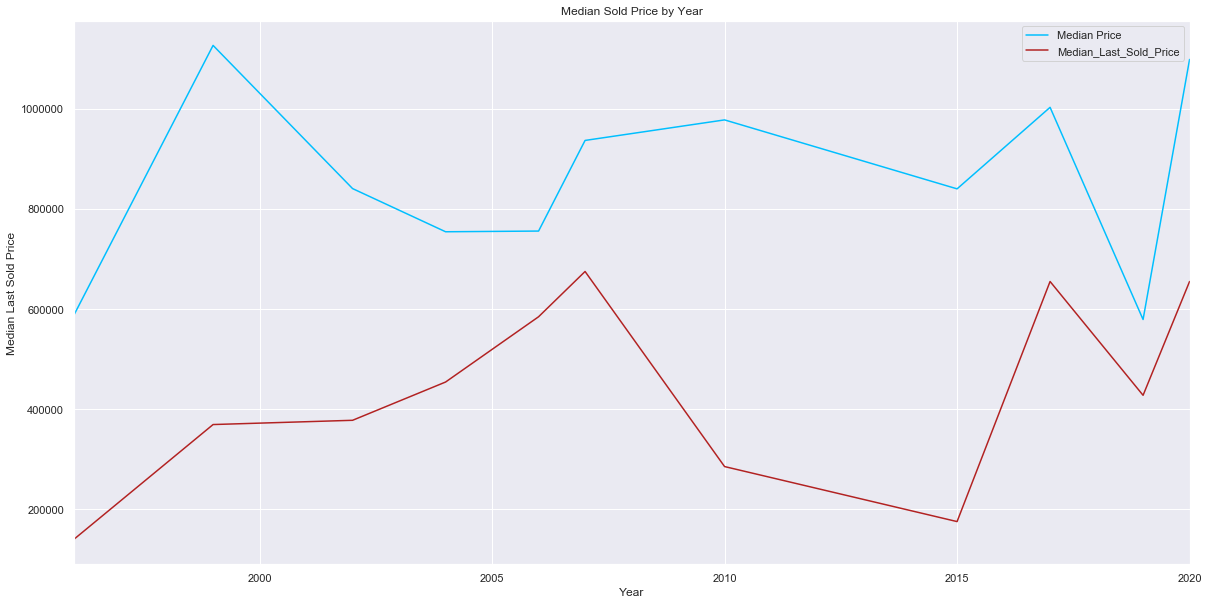

In [41]:
condo=df1.loc[:,["Price","Last_Sold_Price","Year"]]
median_price_by_year = condo.groupby(['Year'])['Price'].median()
median_lastsoldprice_by_year = condo.groupby(['Year'])['Last_Sold_Price'].median()
price_by_hometype=pd.DataFrame(median_price_by_year,columns=["Price"])
medianprice_hometype=price_by_hometype.rename(columns={'Price':'Median Price'})
medianprice_hometype["Median_Last_Sold_Price"]=median_lastsoldprice_by_year
fig, ax = plt.subplots()
color_palette_list =["deepskyblue","firebrick"]
medianprice_hometype.plot(figsize=(20, 10),ax=ax,color=color_palette_list)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.ylabel("Median Last Sold Price")
plt.title("Median Sold Price by Year")
plt.show()

* Current Median price is much higher than the Last sold price for all the years

**Location vs Price**

* Median Price of Home Types in Different Cities

In [42]:
# Median price by grouping hometype and city
city_hometype_plot = df1.groupby(['Home_Type','City'])['Price'].median()
city_hometype_plot

Home_Type  City               
CONDO      BERKELEY               769000
           BURLINGAME            1200000
           CAMPBELL               599000
           CASTRO VALLEY          541000
           CUPERTINO             1229500
                                   ...  
TOWNHOUSE  SAN MATEO             1248500
           SAN RAMON              867000
           SANTA CLARA            983920
           SOUTH SAN FRANCISCO    838944
           UNION CITY             767000
Name: Price, Length: 68, dtype: float64

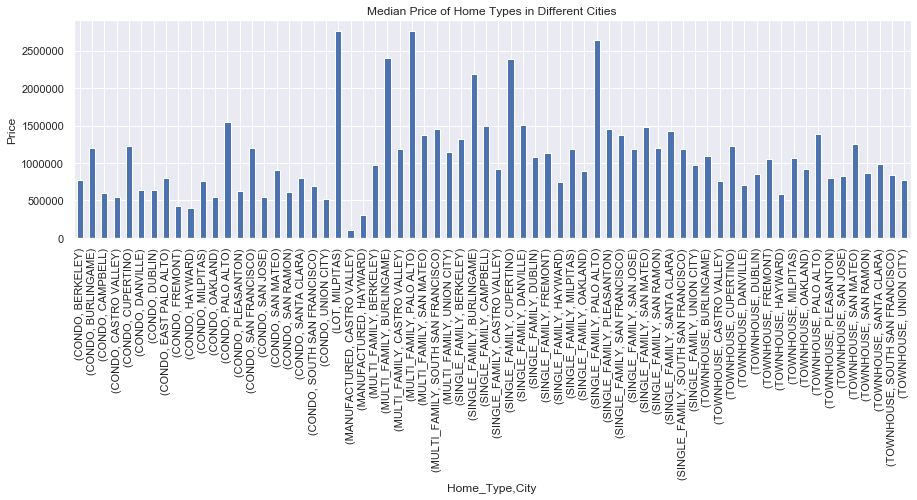

In [43]:
#bar plot for median price of home types in different city
city_hometype_plot.plot(kind='bar', subplots=True, figsize=(15, 4))
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.title('Median Price of Home Types in Different Cities')
plt.ylabel('Price')
plt.show()

* CONDO, TOWNHOUSE, SINGLE FAMILY HOUSE: Highest median price in Palo Alto, lowest median price in Hayward
* LOT: only one in Milpitas
* MANUFACTURED: Highest median price in Hayward, lowest median price in Castro Valley
* MULTI FAMILY HOUSE: Highest median price in Palo Alto, lowest median price in Berkeley

**No of houses avaiable in all cities**

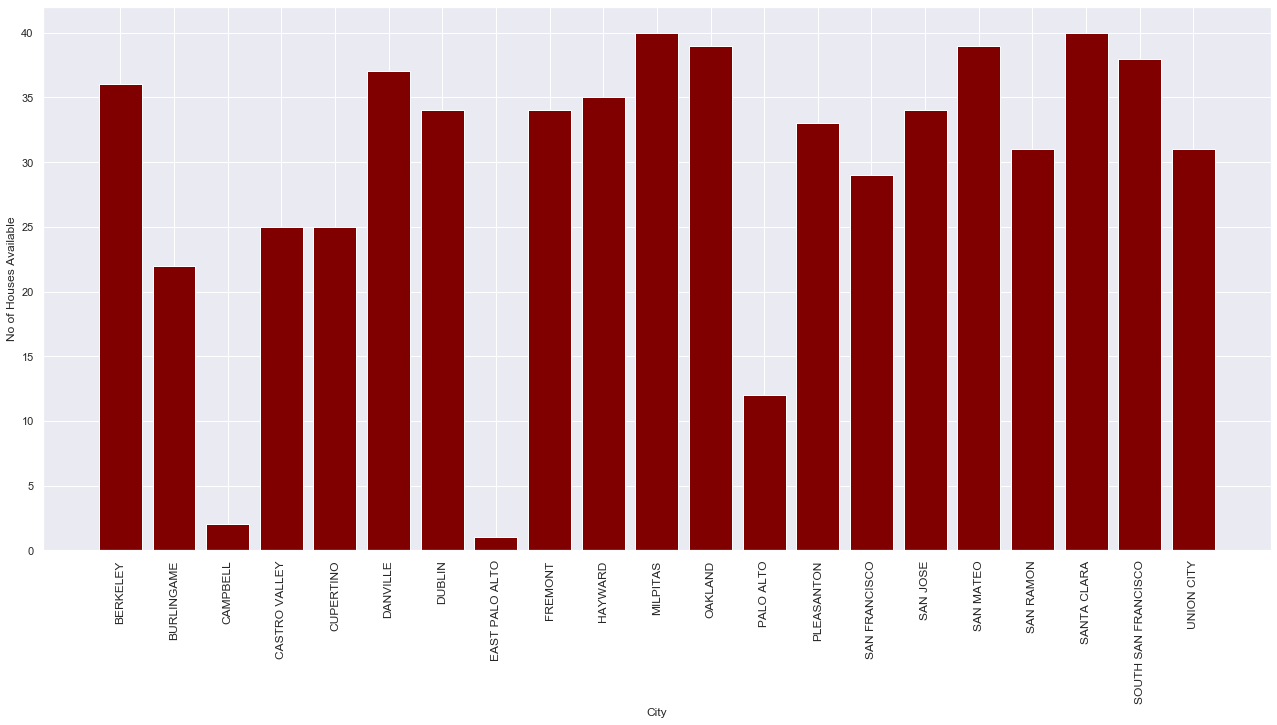

In [44]:
g1 = df1.groupby(["City"]).size().reset_index(name='Number_of_houses_available')
plt.figure(figsize=(22,10))
plt.bar(g1.City,g1.Number_of_houses_available,color='maroon')
plt.xticks(rotation=90,fontsize=12)
plt.xlabel("City",fontsize=12)
plt.ylabel("No of Houses Available",fontsize=12)
plt.show()

* For most of the cities the current listing of houses in Zillow is more 20 in number except for Campbell, East Palo Alto and Palo Alto

In [45]:
#group hometype and city
city_hometype = df1.groupby(['Home_Type','City'])['Home_Type'].count()
city_hometype

Home_Type  City               
CONDO      BERKELEY                5
           BURLINGAME              7
           CAMPBELL                1
           CASTRO VALLEY           1
           CUPERTINO               6
                                  ..
TOWNHOUSE  SAN MATEO               4
           SAN RAMON               2
           SANTA CLARA            10
           SOUTH SAN FRANCISCO     2
           UNION CITY              4
Name: Home_Type, Length: 68, dtype: int64

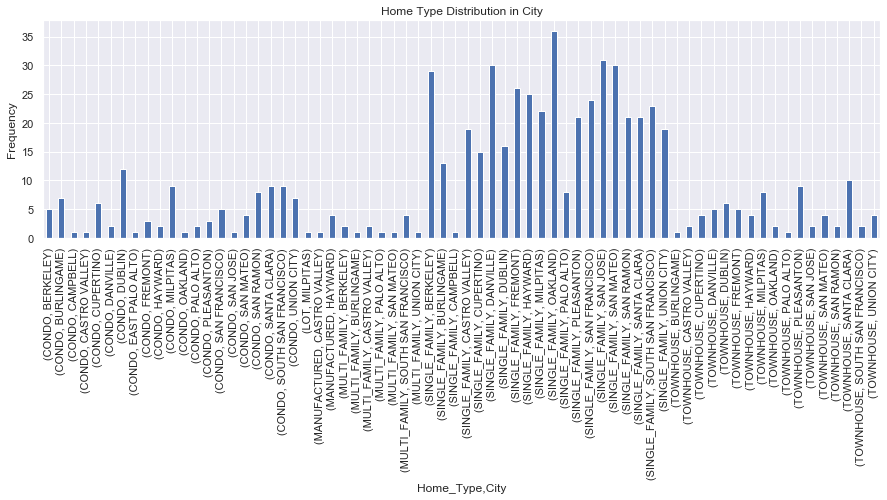

In [46]:
#bar plot for hometype distribution in cities
city_hometype.plot(kind='bar', subplots=True, figsize=(15, 4))
plt.title('Home Type Distribution in City')
plt.ylabel('Frequency')
plt.show()

* The single family houses in Oakland are sold the most on Zillow 



**Median Price in cities**

In [47]:
average_price_by_city = df1.groupby(['City'])['Price'].median()
average_price_by_city 
# Dataframe of median price by city
price_by_city=pd.DataFrame(average_price_by_city, columns=['Price'])
averageprice_city=price_by_city.rename(columns={'Price':'Median Price'})
averageprice_city.sort_values(by='Median Price',ascending=False)

,Median Price
City,
PALO ALTO,2543500
BURLINGAME,1891944
CUPERTINO,1825000
SAN MATEO,1390000
BERKELEY,1295000
DANVILLE,1279950
SAN FRANCISCO,1259000
SANTA CLARA,1111944
MILPITAS,1099694


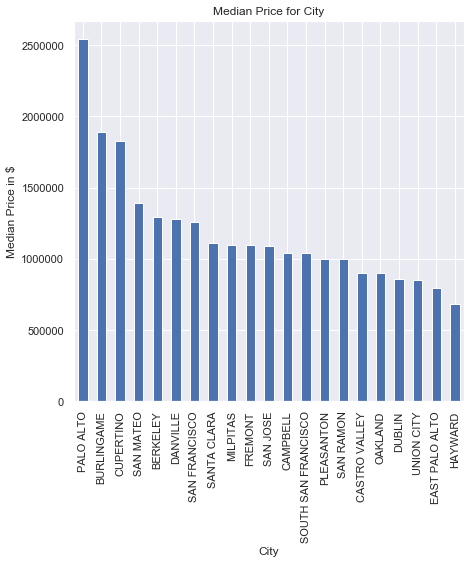

In [48]:
# bar chart presents median price for city
city=average_price_by_city.sort_values(ascending=False)
city.plot.bar()
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.xlabel('City')
plt.ylabel('Median Price in $')
plt.title('Median Price for City') 
plt.show()

* From the bar chart above, we can see that in the Bay Area, PALO ALTO has the highest median price. While Hayward has the lowest median price.

**Understanding the median price of House Type in Palo Alto City**

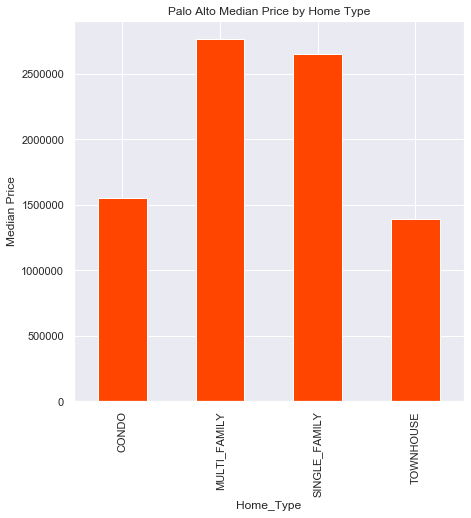

In [49]:
highestcity=df1.loc[:,["Home_Type","City","Price"]]
highestcity=highestcity[highestcity['City']=="PALO ALTO"]
highestcity=highestcity.groupby(['Home_Type'])['Price'].median()
highestcity.plot.bar(color="orangered")
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.ylabel("Median Price")
plt.xlabel("Home_Type")
plt.title("Palo Alto Median Price by Home Type")
plt.show()

* The median price of Multi Family is the highest followed by Single Family

**Understanding the median last sold price by Home Type in Palo Alto**

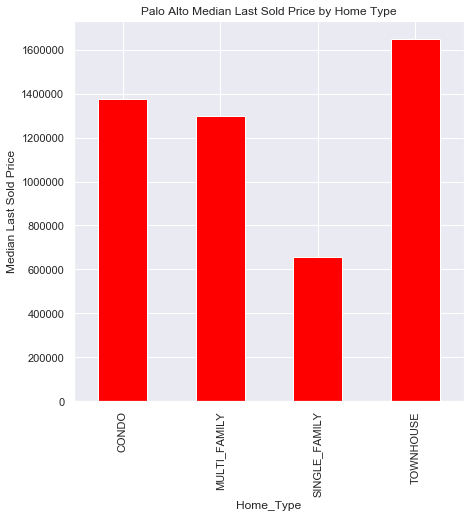

In [50]:
highestcity=df1.loc[:,["Home_Type","City","Last_Sold_Price"]]
highestcity=highestcity[highestcity['City']=="PALO ALTO"]
highestcity=highestcity.groupby(['Home_Type'])['Last_Sold_Price'].median()
highestcity.plot.bar(color="red")
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.ylabel("Median Last Sold Price")
plt.xlabel("Home_Type")
plt.title("Palo Alto Median Last Sold Price by Home Type")
plt.show()

* The last sold price of Townhouse is more as compared to the other home type

**Median Price by month_year**

In [51]:
average_price_by_monthyear = df1.groupby(['MonthYear_value'])['Price'].median()
price_by_monthyear=pd.DataFrame(average_price_by_monthyear, columns=['Price'])
averageprice_monthyear=price_by_monthyear.rename(columns={'Price':'Median Price'})
averageprice_monthyear#.sort_values(by='Median Price')

,Median Price
MonthYear_value,
1996-12,586519
1999-12,1126987
2002-03,966848
2002-06,714639
2004-04,969593
2004-06,539271
2006-03,696764
2006-04,814879
2007-01,937020


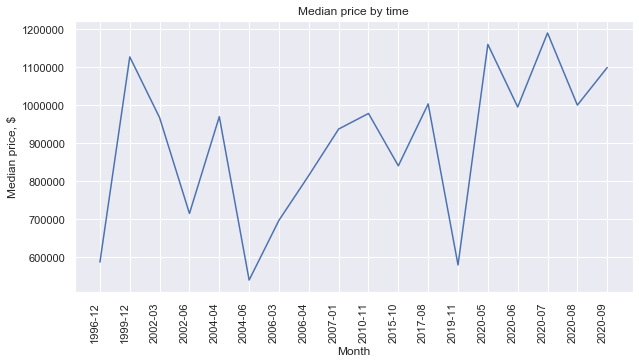

In [52]:
#plot
plt.figure(figsize=(10,5))
plt.plot(averageprice_monthyear, )
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.ylabel('Median price, $')
plt.xlabel('Month')
plt.xticks(rotation=90, horizontalalignment='right')
plt.title('Median price by time')
plt.show()

* From the chart above, we can see during the pandemic period (2020-05 to 2020-09) the median housing price is fluctuated, but still in the range of $1,000,000 - 1,200,000.

**Bedroom vs Price**

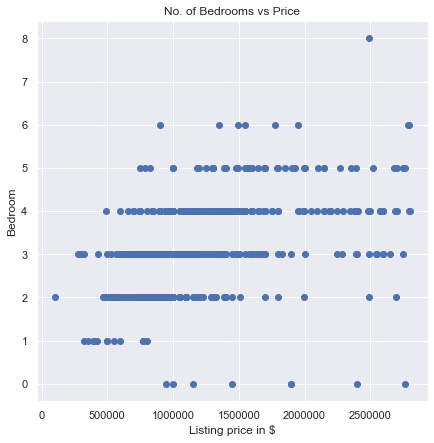

In [53]:
plt.scatter(df1['Price'],df1['Bedroom'])
plt.ylabel('Bedroom')
plt.xlabel('Listing price in $')
plt.title('No. of Bedrooms vs Price')
plt.show()

* Looking at the higher price side, most of the house has higher price, also has more bedrooms. However, there are still many houses have more bedroom has lower price. It can be explained that there is other feature affects to the housing price.

Bedroom
0   1674500
1    497000
2    799000
3    999950
4   1324888
5   1671500
6   1662000
8   2490000
Name: Price, dtype: float64


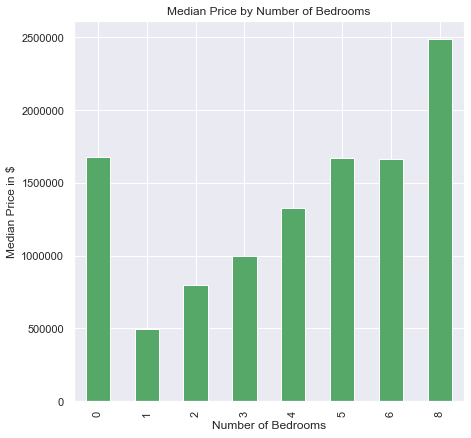

In [54]:
average_price_by_bedroom = df1.groupby(['Bedroom'])['Price'].median()
print(average_price_by_bedroom )
average_price_by_bedroom.plot.bar(color='g')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Median Price in $')
plt.title('Median Price by Number of Bedrooms') 
plt.show()

* The bar chart shows that the more bedrooms, the higher median price. The number of bedroom has positive relation with housing price. However, the house with 0 bedroom also has high median price, this means that housing price still depends on several other factors.

**Bathroom vs Price**

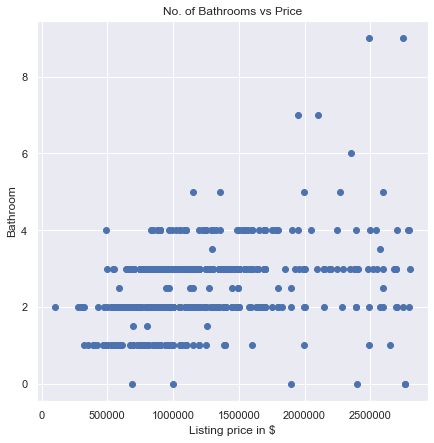

In [55]:
plt.scatter(df1['Price'],df1['Bathroom'])
plt.ylabel('Bathroom')
plt.xlabel('Listing price in $')
plt.title('No. of Bathrooms vs Price')
plt.show()

Bathroom
0   2148500
1    849000
2    798000
2    992000
2   1361000
3   1197888
4   1935000
4   1512000
5   1995000
6   2350000
7   2025000
9   2619500
Name: Price, dtype: float64


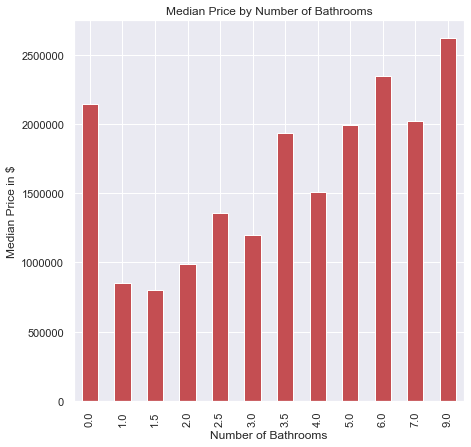

In [56]:
average_price_by_bathroom = df1.groupby(['Bathroom'])['Price'].median()
print(average_price_by_bathroom )
average_price_by_bathroom.plot.bar(color='r')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Median Price in $')
plt.title('Median Price by Number of Bathrooms') 
plt.show()

* The bar chart above does not show any significant trend. It's fluctuated. We can say that the number of bathroom does not really effect on the housing price.

**Living Area(Sqft) vs Price**

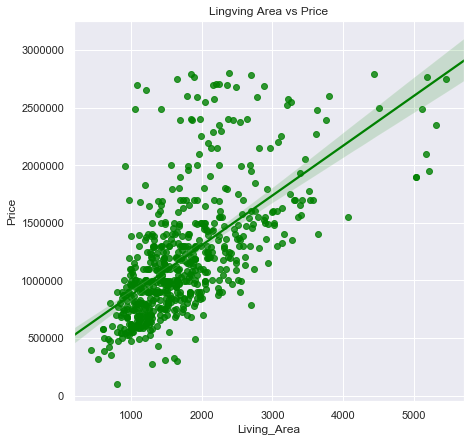

In [57]:
sns.regplot('Living_Area','Price',data=df1,color='green')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.title('Lingving Area vs Price')
plt.show()

* The line shows an upward trend, that the larger living area, the housing price tends to be higher. Therefore, the Living Area has a positive relationship to the housing price.
* So, the living area is a factor can make the housing price higher.

**Lot_Size(Sqft) vs Price**

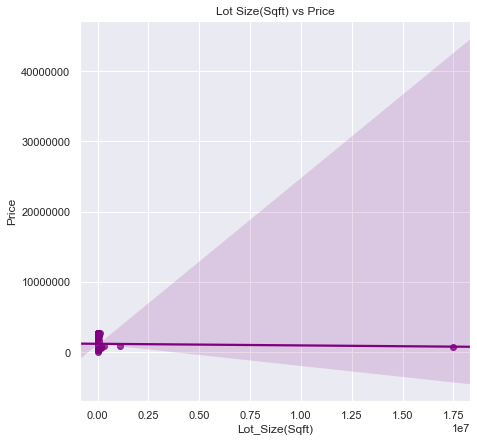

In [58]:
sns.regplot('Lot_Size(Sqft)','Price',data=df1,color='purple')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.title('Lot Size(Sqft) vs Price')
plt.show()

* From the plot above, we can see the Lot Size does not affect much to the housing price.

**Average School Rating vs Price**

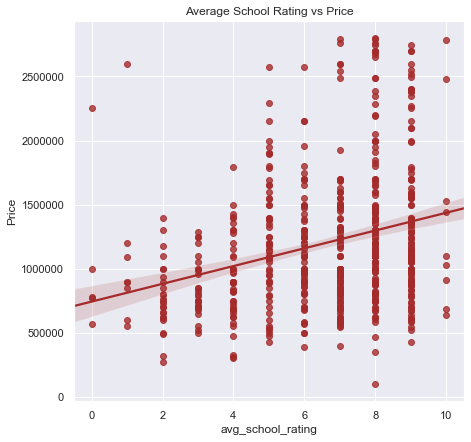

In [59]:
sns.regplot('avg_school_rating','Price',data=df1,color='brown')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.title('Average School Rating vs Price')
plt.show()

* The line shows an upward trend, School rating and housing price have positive relationship. 
* From the plot, we can also see that the houses with higher average school rating still have low price. However, most of the house with the high price has higher school rating. 
* So, it can be said that school rating can be a factor that affect to the housing price.

**HOA per Month**


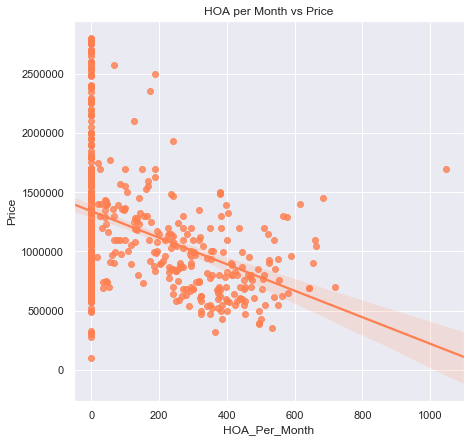

In [60]:
# scatterplot of HOA vs Price (both houses no applys HOA and apply HOA)
sns.regplot('HOA_Per_Month','Price',data=df1,color='coral')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.title('HOA per Month vs Price')
plt.show()

* From the plot, we can see the negative relationship between HOA per month and the housing price.
* Most of the house with lower price has high HOA fee.

**HOA per month using the HOA data from the website only (creating a separated dataframe name "df_HOA")**

In [61]:
df_HOA=df1.loc[df1['HOA_Per_Month']>0,['City','Home_Type','Price','HOA_Per_Month']]# 0 is the value that filled in the missing values.
df_HOA

,City,Home_Type,Price,HOA_Per_Month
1,UNION CITY,CONDO,499000,325
5,CASTRO VALLEY,SINGLE_FAMILY,899950,66
11,SAN MATEO,SINGLE_FAMILY,1695000,150
13,SAN RAMON,SINGLE_FAMILY,1199888,225
16,SAN FRANCISCO,SINGLE_FAMILY,2575000,68
...,...,...,...,...
605,SANTA CLARA,CONDO,495000,495
607,DUBLIN,CONDO,833888,250
608,PLEASANTON,TOWNHOUSE,900000,295
609,MILPITAS,TOWNHOUSE,1199000,293


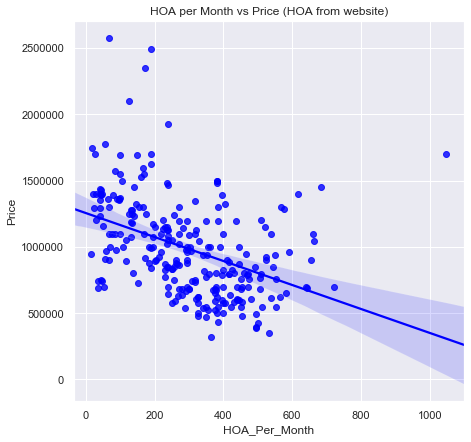

In [62]:
# scatterplot of HOA vs Price (only houses have HOA from website)
sns.regplot('HOA_Per_Month','Price',data=df_HOA,color='blue')
plt.title('HOA per Month vs Price (HOA from website)')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.ylabel('Price')
plt.show()

* This plot has the same trend as the plot above, except that there is no more value 0(as known as missing value).

**Median HOA/month in different cities**

In [63]:
average_HOA_by_city = df_HOA.groupby(['City'])['HOA_Per_Month'].median()
average_HOA_by_city 
# Dataframe of median HOA/month by city
HOA_by_city=pd.DataFrame(average_HOA_by_city, columns=['HOA_Per_Month'])
averageHOA_city=HOA_by_city.rename(columns={'HOA_Per_Month':'Median HOA/month'})
averageHOA_city.sort_values(by='Median HOA/month',ascending=False)

,Median HOA/month
City,
BURLINGAME,544
CAMPBELL,445
EAST PALO ALTO,415
PALO ALTO,397
SANTA CLARA,382
CUPERTINO,382
PLEASANTON,364
OAKLAND,328
SAN MATEO,326


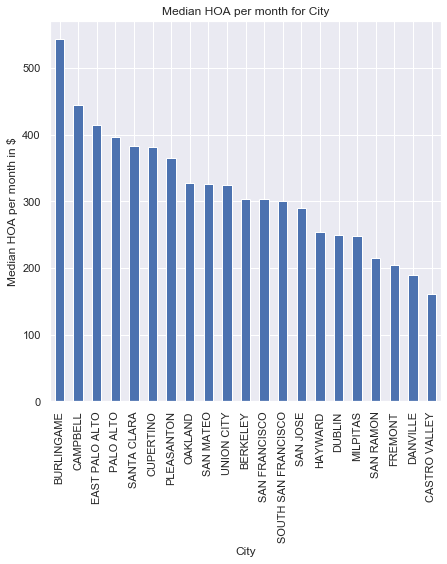

In [64]:
# bar chart presents average HOA for city
city_HOA=average_HOA_by_city.sort_values(ascending=False)
city_HOA.plot.bar()
plt.xlabel('City')
plt.ylabel('Median HOA per month in $')
plt.title('Median HOA per month for City') 
plt.show()

* The bar chart presents that Burlingame is the city has the highest median HOA fee per month.

In [65]:
#Calculating the Median HOA by HomeType
average_HOA_by_hometype = df_HOA.groupby(['Home_Type'])['HOA_Per_Month'].median()
average_HOA_by_hometype 
# Dataframe of average price by city
HOA_by_hometype=pd.DataFrame(average_HOA_by_hometype, columns=['HOA_Per_Month'])
averageHOA_hometype=HOA_by_hometype.rename(columns={'HOA_Per_Month':'Median HOA/month'})
averageHOA_hometype

,Median HOA/month
Home_Type,
CONDO,405
SINGLE_FAMILY,135
TOWNHOUSE,311


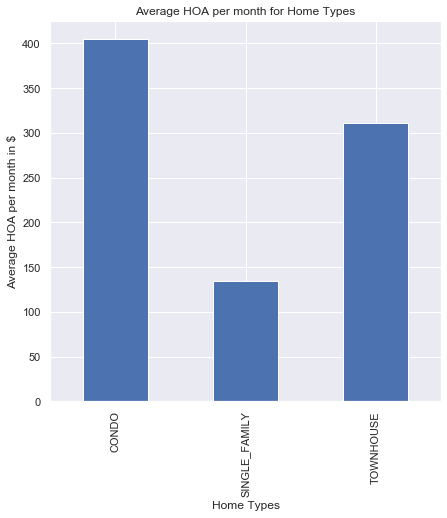

In [66]:
# bar chart presents average HOA for hometype
average_HOA_by_hometype.plot.bar()
plt.xlabel('Home Types')
plt.ylabel('Average HOA per month in $')
plt.title('Average HOA per month for Home Types') 
plt.show()

* The bar chart shows that Condo has highest median HOA fee per month.
* This also explains for the plot above that the houses with lower price have higher HOA fee because Condo has lowest median price compare to Single family house and Townhouse.

**Heating/Cooling vs Price**

True      575
False      24
unknow     18
Name: hasHeating, dtype: int64
hasHeating
False      951934
True      1099000
unknow     899950
Name: Price, dtype: int64
True      567
unknow     26
False      24
Name: hasCooling, dtype: int64
hasCooling
False     948510
True     1099000
unknow    959796
Name: Price, dtype: float64


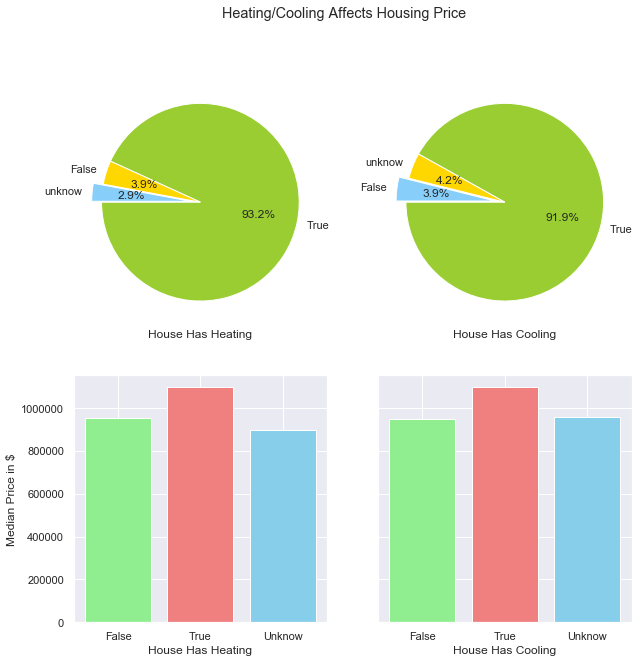

In [67]:
#heating
heating=df1['hasHeating'].value_counts()
print(heating)

average_price_heating = df1.groupby(['hasHeating'])['Price'].median()
print(average_price_heating)

#cooling
cooling=df1['hasCooling'].value_counts()
print(cooling)

average_price_cooling = df1.groupby(['hasCooling'])['Price'].median()
print(average_price_cooling)


#Heating/Cooling charts
fig=plt.figure(figsize=(10,10))
explode=(0,0,0.1)
co=['yellowgreen', 'gold', 'lightskyblue']
f1=fig.add_subplot(2,2,1)
f2=fig.add_subplot(2,2,2)
f3=fig.add_subplot(2,2,3)
f4=fig.add_subplot(2,2,4)
f1.pie(heating,explode=explode,labels=heating.index, autopct='%1.1f%%', shadow=False, startangle=180, colors=co)
f2.pie(cooling, explode=explode,labels=cooling.index, autopct='%1.1f%%', shadow=False, startangle=180, colors=co)
x=["False", "True", "Unknow"]
colors=['lightgreen','lightcoral','skyblue']
f3.bar(x, average_price_heating, color=colors)
f4.bar(x, average_price_cooling, color=colors)
fig.suptitle('Heating/Cooling Affects Housing Price')
f1.set_xlabel('House Has Heating')
f2.set_xlabel('House Has Cooling')
f3.set_xlabel('House Has Heating')
f3.set_ylabel('Median Price in $')
f4.set_xlabel('House Has Cooling')
f4.tick_params(labelleft=False)
plt.show()

* From the pie charts, we can see that most of house in Bay Area have Heating/Cooling (more than 90%). Looking at bar charts we can also can say that the price of houses having Heating/Cooling is higher than houses without Heating/Cooling.

**New construction/NewHome vs Price**

False     606
unknow     10
True        1
Name: isNewConstruction, dtype: int64
isNewConstruction
False    1204078
True     1199000
unknow   1064485
Name: Price, dtype: float64
False    616
True       1
Name: Is_New_Home, dtype: int64
Is_New_Home
False   1201812
True    1199000
Name: Price, dtype: float64


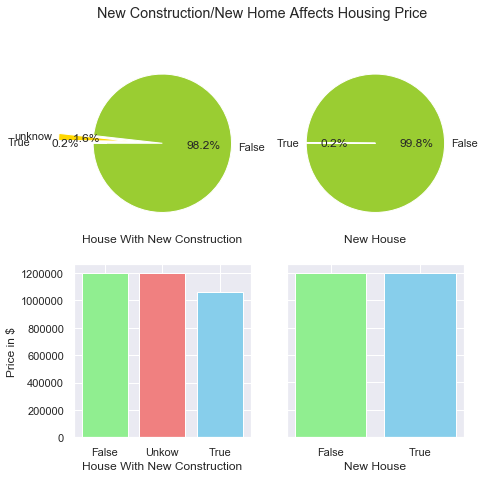

In [68]:
#newConstruction
new_cons=df1['isNewConstruction'].value_counts()
print(new_cons)

average_price_newCons = df1.groupby(['isNewConstruction'])['Price'].mean()
print(average_price_newCons)

#newHome
new_home=df1['Is_New_Home'].value_counts()
print(new_home)

average_price_newHome = df1.groupby(['Is_New_Home'])['Price'].mean()
print(average_price_newHome)

#Charts
fig=plt.figure()
co=['yellowgreen', 'gold', 'lightskyblue']
f1=fig.add_subplot(2,2,1)
f2=fig.add_subplot(2,2,2)
f3=fig.add_subplot(2,2,3)
f4=fig.add_subplot(2,2,4)
f1.pie(new_cons,labels=new_cons.index, explode=(0,0.5,0.8), autopct='%1.1f%%', shadow=False, startangle=180, colors=co)
f2.pie(new_home,labels=new_home.index, autopct='%1.1f%%', shadow=False, startangle=180, colors=co)

x3=["False", "Unkow", "True"]
f3.bar(x3, average_price_newCons, color=['lightgreen','lightcoral','skyblue'])
x4=["False","True"]
f4.bar(x4,average_price_newHome, color=['lightgreen','skyblue'])
fig.suptitle('New Construction/New Home Affects Housing Price')
f1.set_xlabel('House With New Construction')
f2.set_xlabel('New House')
f3.set_xlabel('House With New Construction')
f3.set_ylabel('Price in $')
f4.set_xlabel('New House')
f4.tick_params(labelleft=False)
plt.show()

* As we can see from pie chart, almost of houses in Bay Area are not new construction or new houses. However, this seems not affect on housing price. Clearly, in the first bar chart, the price of the houses without new construction is slight higher than that with new construction. While in the second bar chart, the price is quite similar. We can say that, new construction or new house does not has strong effect on  housing price.

**Current Price and zestimate Price**

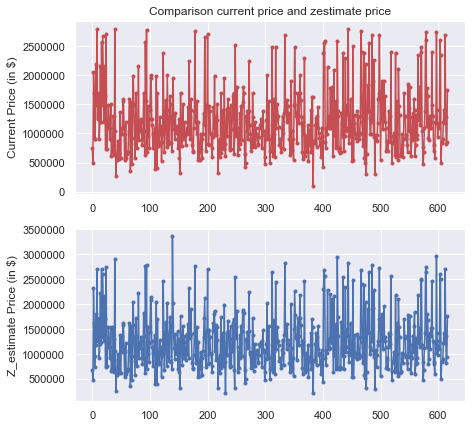

In [69]:
current_price=df1['Price']
Zestimate_price=df1['Zestimate']

plt.subplot(2,1,1)
plt.plot(current_price, 'r.-')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.title("Comparison current price and zestimate price")
plt.ylabel('Current Price (in $)')


plt.subplot(2,1,2) 
plt.plot(Zestimate_price,'b.-')
plt.gcf().axes[1].yaxis.get_major_formatter().set_scientific(False)
plt.ylabel('Z_estimate Price (in $)')
plt.show()

* The current price and the Zestimate price is quite similar

**Current Price and zestimate Price by City**

City
BERKELEY              1371753
BURLINGAME            1826934
CAMPBELL              1043944
CASTRO VALLEY          929680
CUPERTINO             1866275
DANVILLE              1361793
DUBLIN                 906862
EAST PALO ALTO         798000
FREMONT               1189551
HAYWARD                692630
MILPITAS              1111832
OAKLAND                950890
PALO ALTO             2305324
PLEASANTON            1154205
SAN FRANCISCO         1418379
SAN JOSE              1204498
SAN MATEO             1464017
SAN RAMON             1104377
SANTA CLARA           1115276
SOUTH SAN FRANCISCO   1092910
UNION CITY             850889
Name: Price, dtype: float64
City
BERKELEY              1457801
BURLINGAME            1839051
CAMPBELL              1082254
CASTRO VALLEY          938427
CUPERTINO             1881003
DANVILLE              1368404
DUBLIN                 886998
EAST PALO ALTO         792873
FREMONT               1217374
HAYWARD                724220
MILPITAS              1119922
OA

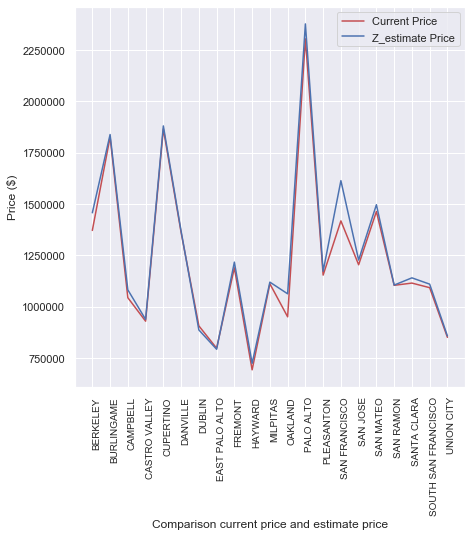

In [70]:
average_price_by_city = df1.groupby(['City'])['Price'].mean()
average_estimate_by_city=df1.groupby(['City'])['Zestimate'].mean()
print(average_price_by_city)
print(average_estimate_by_city)

plt.plot(average_price_by_city,'r-', label='Current Price')
plt.plot(average_estimate_by_city,'b-', label='Z_estimate Price')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.legend(loc = 'upper right')
plt.xlabel('Comparison current price and estimate price')
plt.xticks(rotation=90, fontsize='10', horizontalalignment='left')
plt.ylabel('Price ($)') 
plt.show()

* In general, the listing price and the zestimate price is very similar. In some cities such as Berkeley, Campell, Hayward, Oakland, San Francisco, Santa Clara, the listing price is clearly lower than the Zestimate price.

**REGRESSION**

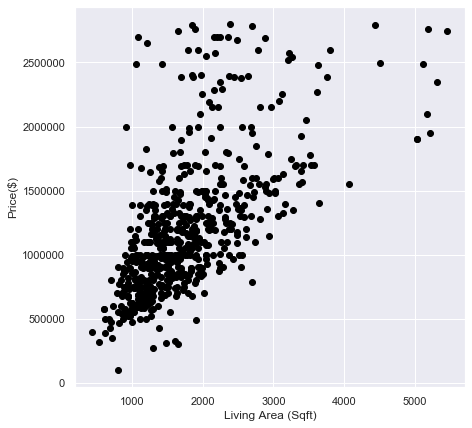

In [71]:
#Code to Plot the original data
plt.scatter(df1["Living_Area"],df1["Price"],c="black")
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.xlabel("Living Area (Sqft)")
plt.ylabel("Price($)")
plt.savefig('Original Scatter Plot')
plt.show()

In [72]:
x=df1['Living_Area'].values.reshape(-1,1)
y=df1['Price'].values.reshape(-1,1)
reg=LinearRegression()
reg.fit(x,y)
print("The linear model is Y={:,.1f}+{:,.1f}x".format(reg.intercept_[0],reg.coef_[0][0]))

The linear model is Y=439,591.0+432.3x


* Regression Coefficient tells us that for every one unit increase in Living Area there is $ 432.3 increase in Price

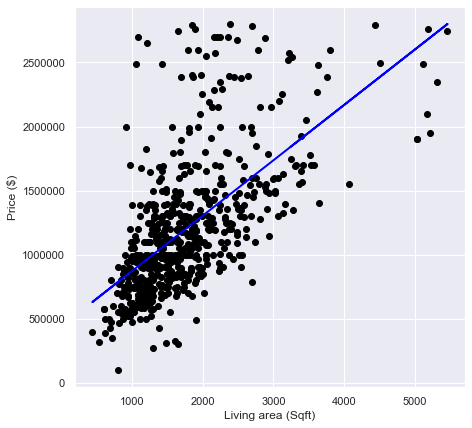

In [73]:
predictions=reg.predict(x)
plt.scatter(df1["Living_Area"],df1["Price"],c="black")
plt.plot(df1["Living_Area"],predictions,c='blue',linewidth=2)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.xlabel("Living area (Sqft)")
plt.ylabel("Price ($)")
plt.savefig('Regression Model Plot')
plt.show()

In [75]:
x=df1['Living_Area']
y=df1['Price']
x2=sm.add_constant(x)
est = sm.OLS(y,x2)
est2=est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                     388.5
Date:                Sun, 11 Oct 2020   Prob (F-statistic):           2.11e-67
Time:                        22:47:35   Log-Likelihood:                -8860.4
No. Observations:                 617   AIC:                         1.772e+04
Df Residuals:                     615   BIC:                         1.773e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.396e+05   4.22e+04     10.424      

* **P value** = 0 tells us that there is strong correlation between these two variables and the model is significant. **R Square** value tells us that about 38 % of the variability of Price is explained by the increase in Living Area (sqft)